# Color Detection, Clustering and Image Labelling Model


In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cv2 as cv
import pandas as pd
from sklearn.cluster import KMeans

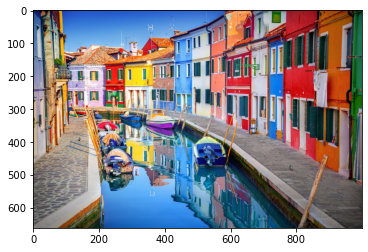

In [5]:
img = cv.imread('colorpic.jpg')
img2 = img
img4= cv.cvtColor(img,cv.COLOR_BGR2RGB)
clicked = False
r = g = b = xpos = ypos = 0

plt.imshow(img4)
plt.show()

In [6]:
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('colors.csv', names=index, header=None)
csv

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


In [7]:
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname


def draw_function(event, x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [8]:
cv.namedWindow('image')
cv.setMouseCallback('image',draw_function)

while(1):

    cv.imshow("image",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv.rectangle(img,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv.LINE_AA)
            
        clicked=False

    #Break the loop when user hits 'esc' key
    if cv.waitKey(20) & 0xFF ==27:
        break
    
cv.destroyAllWindows()

## Clustering

In [9]:
img3 = img4.reshape((img.shape[1]*img.shape[0],3))

#### Elbow Method

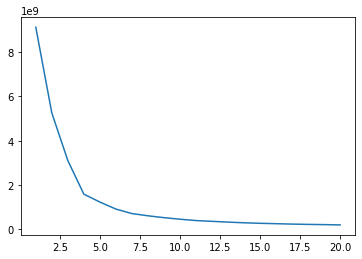

In [8]:
md=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(img3)
    o=kmeans.inertia_
    md.append(o)
##print(md)
plt.plot(list(np.arange(1,21)),md)
plt.show()

## Color Cluster trainning and representation

Enter the number of color cluster you want to form: 
5


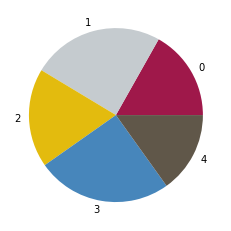

In [10]:
i = int(input('Enter the number of color cluster you want to form: \n'))
kmeans=KMeans(n_clusters= i)
s=kmeans.fit(img3)

labels=kmeans.labels_

centroid=kmeans.cluster_centers_
labels=list(labels)
percent=[]

for i in range(len(centroid)):
    j=labels.count(i)
    j=j/(len(labels))
    percent.append(j)
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

In [11]:
#BGR code for centroid of all clusters
centroid

array([[158.94623884,  23.87547811,  73.5018315 ],
       [197.37370202, 203.29474718, 206.59640542],
       [226.78124104, 187.35663482,  14.29766276],
       [ 71.19984262, 134.35456124, 186.57523607],
       [ 96.05901476,  86.50462817,  73.44428139]])

### Color Cluster dataset generation

In [12]:
centroid_int = centroid.astype(np.int32)
centroid_int[0]

array([158,  23,  73])

In [13]:
## dictionary formation of the centroid's upper and lower limit in hsv scale and name of color from dataset 
color_dict_HSV = {}

for i in centroid_int:
    input_color = np.uint8([[i]]) #here insert the bgr values which you want to convert to hsv
    hsv = cv.cvtColor(input_color, cv.COLOR_BGR2HSV)
    #print(hsvGreen)
    lowerLimit = hsv[0][0][0] - 10, 100, 100
    upperLimit = hsv[0][0][0] + 10, 255, 255
    
    b,g,r = i
    color_name = getColorName(r,g,b)
    
    color_dict_HSV[color_name] = [list(lowerLimit),list(upperLimit)]


color_dict_HSV

{'Indigo (Web)': [[121, 100, 100], [141, 255, 255]],
 'Pastel Gray': [[10, 100, 100], [30, 255, 255]],
 'Cyan (Process)': [[86, 100, 100], [106, 255, 255]],
 'Peru': [[6, 100, 100], [26, 255, 255]],
 'Feldgrau': [[93, 100, 100], [113, 255, 255]]}

## Processing and Implementation

Do you want to label this region?no
Do you want to label this region?yes
what should this region be called?yellow house and footpath
Do you want to label this region?yes
what should this region be called?sky
Do you want to label this region?no
Do you want to label this region?no


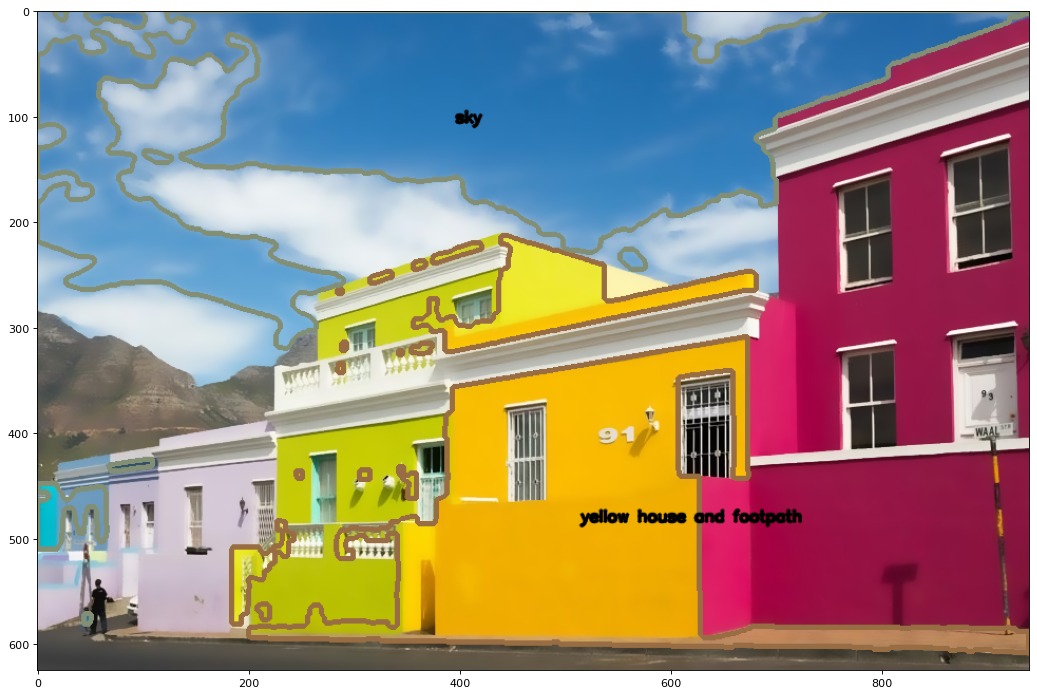

In [14]:
img = cv.bilateralFilter(img2, 15, 55, 35)

# convert to hsv colorspace
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

output0 = img.copy()
output1 = img.copy()
final_output = img

for i in color_dict_HSV.values():
    
    lower_bound = np.array(i[0])
    upper_bound = np.array(i[1])
    
    # find the colors within the boundaries
    mask = cv.inRange(hsv, lower_bound, upper_bound)
    
    #define kernel size  
    kernel = np.ones((5,5),np.uint8)
    
    # Remove unnecessary noise from mask
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

    # Segment only the detected region
    segmented_img = cv.bitwise_and(img, img, mask = mask)

    # Find contours from the mask
    contours, hierarchy = cv.findContours(mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    output = cv.drawContours(segmented_img, contours, -1, (0, 0, 0), 3)
    output2 = cv.drawContours(output0.copy(), contours, -1,(0,0,0,),3)
    while(1):
        
        cv.imshow('image',output2)
        cv.waitKey(500)
        answer = input('Do you want to label this region?')
        
        if(answer == 'yes' or answer == 'Yes' or answer == 'YES'):
            
            r = random.randint(0,255)
            b = random.randint(0,255)
            g = random.randint(0,255)
            output1 = cv.drawContours(final_output, contours, -1, (r, b, g), 3)
            label = input('what should this region be called?')
            sorted_contours = sorted(contours, key = cv.contourArea, reverse = True)
            a = sorted_contours[0]
            M = cv.moments(a)
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv.putText(output1, text = label, org = (cx,cy), fontFace= cv.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0,0,0),thickness=2, lineType=cv.LINE_AA)
            if(i == len(color_dict_HSV)-1):
                cv.destroyAllWindows()
                exit()
            break
            
        if(answer == 'no'):
            if(i == len(color_dict_HSV)-1):
                cv.destroyAllWindows()
                exit()
            break
            #Break the loop when user hits 'esc' key 
        if cv.waitKey(20) & 0xFF ==27:
            break
        #plt.show()        
        
        cv.destroyAllWindows()
    

final_output = cv.cvtColor(final_output, cv.COLOR_BGR2RGB)

figure(figsize=(16, 12), dpi=80)
plt.imshow(final_output)
plt.show()